In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

In [351]:
train.shape 

(891, 12)

In [352]:
test.shape

(418, 11)

In [353]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [354]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Around 19.86% of the Age data is missing in train set. The proportion of Age missing is small enough for reasonable replacement with mean value. In Cabin column, we have so many missing values out of the whole data so we will drop this column

In [355]:
# Dropping the "Cabin" column from the train dataframe 
train = train.drop(columns='Cabin', axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [356]:
# Dropping the "Cabin" column from the test dataframe 
test = test.drop(columns='Cabin', axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S


In [357]:
# Replacing the missing vlaues in "Age" column with mean 
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [358]:
# Find the number of people survived and didn't survive
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

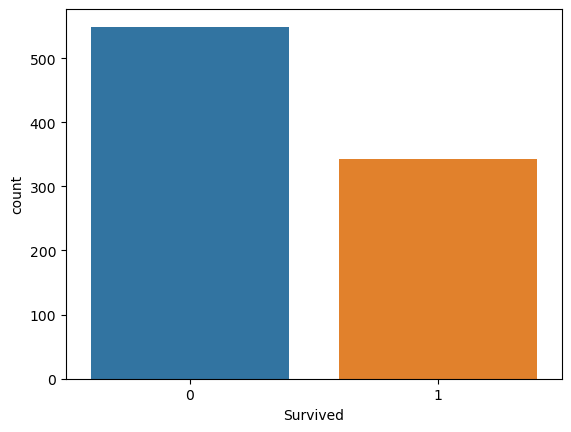

In [359]:
#plot for Survived Column
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Sex', ylabel='count'>

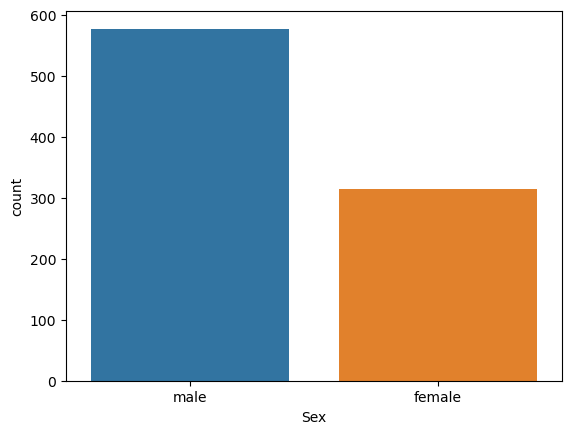

In [360]:
#pLot for the sec column
sns.countplot(x='Sex', data=train)

In [361]:
#Now let's check the probability of survival for each sex
train.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

### Females had higher probability of survival than males

In [362]:
females = train[train['Sex'] == 'female']
females['Survived'].value_counts()/len(females)

Survived
1   0.74
0   0.26
Name: count, dtype: float64

In [363]:
males = train[train['Sex'] == 'male']
males['Survived'].value_counts()/len(males)

Survived
0   0.81
1   0.19
Name: count, dtype: float64

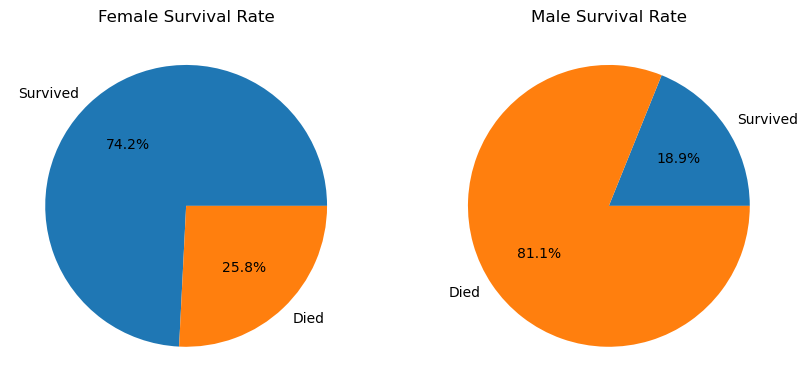

In [364]:
#Pie plot for showing the porbability of survival or death for each sex
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie([females_survived[1], len(females) - females_survived[1]], 
        labels=['Survived', 'Died'], 
        autopct='%1.1f%%')
ax1.set_title('Female Survival Rate')

ax2.pie([males_survived[1], len(males) - males_survived[1]], 
        labels=['Survived', 'Died'], 
        autopct='%1.1f%%')
ax2.set_title('Male Survival Rate')

plt.show()

In [365]:
train.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

### Count of classification of survival according to ticket class

Text(0.5, 1.0, 'Count of people according to ticket class in which people survived')

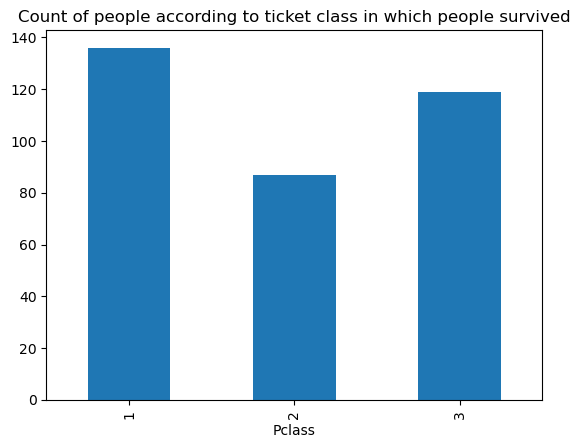

In [366]:
plt.figure()
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Count of people according to ticket class in which people survived')


Text(0.5, 1.0, 'Count of people according to ticket class in which people didnt survive')

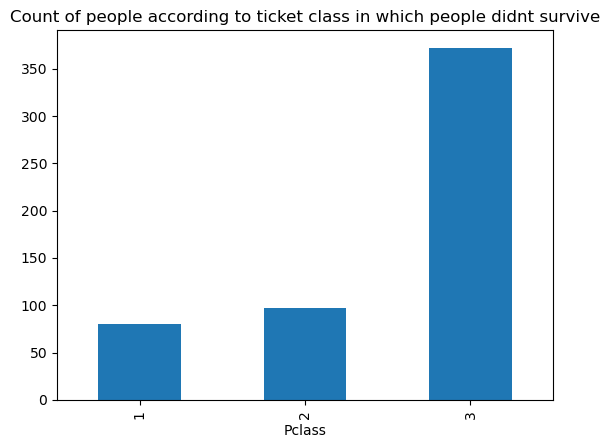

In [367]:
plt.figure()
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Count of people according to ticket class in which people didnt survive')

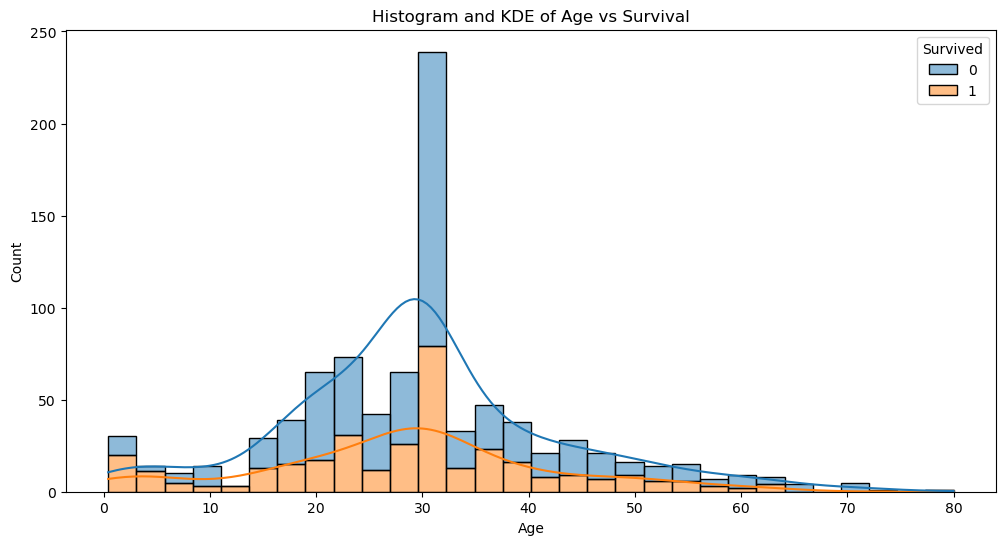

In [381]:
# Create a histogram and KDE plot
plt.figure(figsize=(12, 6))

# Histogram with KDE
sns.histplot(data=train, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Histogram and KDE of Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Fill the 2 missing values of embarked column by UnKnown

In [280]:
train['Embarked'].fillna('Unknown', inplace=True)

In [281]:
#Check the unique values of Embarked column
train['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

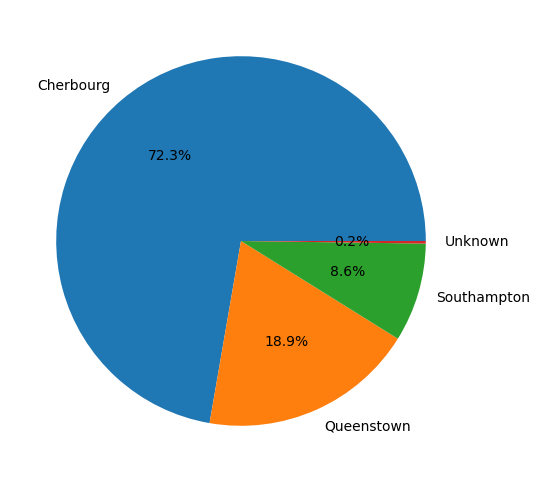

In [282]:
#Create a pie chart to see how many passengers embarked from each port
fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
ax1.pie(train['Embarked'].value_counts(), labels=['Cherbourg', 'Queenstown', 'Southampton', 'Unknown'], autopct='%1.1f%%')
plt.show()

In [283]:
# convert categorical columns 
train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2,"Unknown":3}}, inplace=True)
test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2,"Unknown":3}}, inplace=True)

In [284]:
#Check the correlation between target variable and numerical columns
train.select_dtypes(include=['int64', 'float64']).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.029906
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.118026
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.028566
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.128526
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.023578
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.063794
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.082144
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.071010
Embarked,-0.029906,0.118026,0.028566,0.128526,0.023578,-0.063794,-0.082144,0.071010,1.000000


In [285]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [286]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


### Feature Selection

#### Drop All Useless Columns

In [287]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis = 1)
test = test.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [289]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

In [290]:
print(y_train.head(3))

0    0
1    1
2    1
Name: Survived, dtype: int64


In [291]:
print(X_train.head(3))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0


### Train and test split

In [292]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [293]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 7), (712,), (712,), (179,))

# Training Model

### Logistic regression

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Initialize the Logistic Regression model
LR_model = LogisticRegression()

# Fit the model on the training data
LR_model.fit(X_train, y_train)

C:\Users\shere\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [327]:
# Evaluate the model
model1_acc  = accuracy_score(y_val, y_val_pred)
conf_matrix_1 = confusion_matrix(y_val, y_val_pred)
class_report_1 = classification_report(y_val, y_val_pred)

print("Accuracy:", model1_acc)
print("Confusion Matrix:\n", conf_matrix_1)
print("Classification Report:\n", class_report_1)

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## GaussianNB model

In [325]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_val)
model2_acc = accuracy_score(y_val,y_pred2)

print("Accuracy Score:",model2_acc)

Accuracy Score: 0.776536312849162


In [328]:
# Evaluate model2
model2_conf_matrix = confusion_matrix(y_val, y_pred2)
model2_class_report = classification_report(y_val, y_pred2)

print("Confusion Matrix:\n", model2_conf_matrix)
print("Classification Report:\n", model2_class_report)

Confusion Matrix:
 [[85 20]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## XGBoost 

In [332]:
from xgboost import XGBClassifier

model3 = XGBClassifier(objective='binary:logistic')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_val)
model3_acc = accuracy_score(y_val,y_pred3)

print("XGB accuracy Score:",model3_acc)

XGB accuracy Score: 0.8156424581005587


In [342]:
# Evaluate model3
model3_conf_matrix = confusion_matrix(y_val, y_pred3)
model3_class_report = classification_report(y_val, y_pred3)

print("Confusion Matrix:\n", model3_conf_matrix)
print("Classification Report:\n", model3_class_report)

Confusion Matrix:
 [[89 16]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_val)
model4_acc = accuracy_score(y_val,y_pred4)

print("Random forest accuracy Score:",model4_acc)

Random forest accuracy Score: 0.8156424581005587


In [343]:
# Evaluate model4
model4_conf_matrix = confusion_matrix(y_val, y_pred4)
model4_class_report = classification_report(y_val, y_pred4)

print("Confusion Matrix:\n", model4_conf_matrix)
print("Classification Report:\n", model4_class_report)

Confusion Matrix:
 [[92 13]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [344]:
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
comparison_df = comparison_df.set_index('Accuracy')
comparison_df.head()

,Model
Accuracy,
0.82,XGBoost
0.82,Random Forest
0.80,Logistic Regression
0.78,GaussianNBg
